In [1]:

import numpy as np
import random as rn 
import pandas as pd
import seaborn as sns


In [2]:
iris=pd.read_csv('iris.csv')

In [3]:
iris.head()

sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

In [4]:
list(iris.columns)


['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety']

In [5]:
iris.iloc[0] #iloc -> wiersze #iris.iloc[0][0]?


sepal.length       5.1
sepal.width        3.5
petal.length       1.4
petal.width        0.2
variety         Setosa
Name: 0, dtype: object

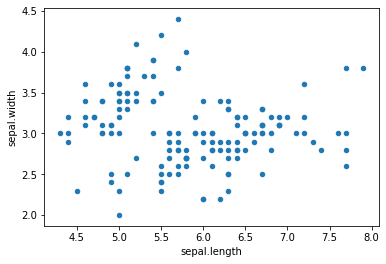

In [6]:
iris.plot(kind="scatter",x='sepal.length',y='sepal.width')


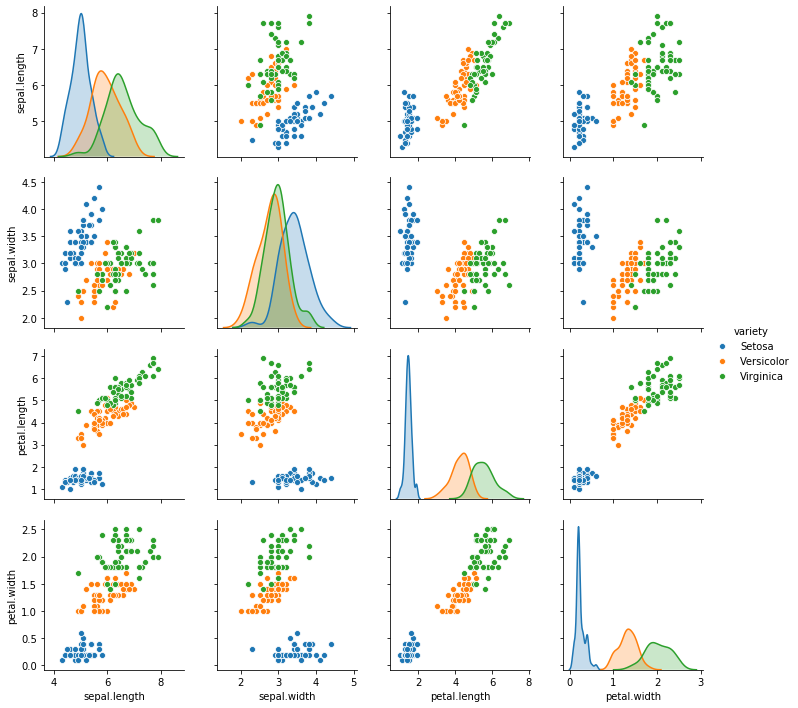

In [7]:
sns.pairplot(iris,hue="variety")

In [14]:
class DataProcessing:
    @staticmethod
    def shuffle(x):
        for i in range(len(x)-1,0,-1):
            j=rn.randint(0,i-1)
            x.iloc[i], x.iloc[j] = x.iloc[j], x.iloc[i]
    @staticmethod
    def normalization(x):
        #x' = (x-min)/(max-min)
        values = x.select_dtypes(exclude=["object"]) #kopia zbioru x bez nazw kwiatów
        columnNames=values.columns.tolist() #nazwy kolumn z atrybutami
        for column in columnNames:
            data = x.loc[:,column] #wszystkie rekordy z jednej z kolumn
            max1=max(data)
            min1=min(data)
            for row in range(0, len(x),1):
                xprim=(x.at[row,column]-min1)/(max1-min1)
                x.at[row,column]=xprim


    @staticmethod
    def split(x,k): #k=0.7 -> 70% do zbioru treningowego, 30% testowy
        split_index=int(k*len(x))
        df1 = x[:split_index] #divide dataframe by rows
        df2 = x[split_index:]
        
        return df1, df2

In [15]:
DataProcessing.shuffle(iris)
iris.head()

trainingSet, validatingSet = DataProcessing.split(iris,0.7)



In [17]:
DataProcessing.normalization(trainingSet)
display(type(trainingSet))
trainingSet.head()


pandas.core.frame.DataFrame

sepal.length  sepal.width  petal.length  petal.width     variety
0      0.091270     0.084388      0.115152     0.266667  Versicolor
1      0.680556     0.535865      0.550000     0.400000  Versicolor
2      0.763889     0.535865      0.616667     0.400000  Versicolor
3      0.043651     0.137131      0.003030     0.016667      Setosa
4      0.833333     0.651899      0.750000     0.600000  Versicolor

In [20]:
class KNN:
    @staticmethod
    def distance(v1, v2):
        tmp=0
        for i in range(len(v1)):
            tmp += (v1[i]-v2[i])**2
        return tmp**(1/2)

In [39]:
vectors = trainingSet.select_dtypes(exclude=["object"]) #kopia zbioru x bez nazw kwiatów oraz nagłówków
display(vectors.head())
distances = []
test_vector = validatingSet.select_dtypes(exclude=["object"]).iloc[0]
for i in vectors.values:
    distances.append(KNN.distance(test_vector, i))
trainingSet["distance"]=distances

sepal.length  sepal.width  petal.length  petal.width
0      0.091270     0.084388      0.115152     0.266667
1      0.680556     0.535865      0.550000     0.400000
2      0.763889     0.535865      0.616667     0.400000
3      0.043651     0.137131      0.003030     0.016667
4      0.833333     0.651899      0.750000     0.600000

C:\Programy\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [40]:
trainingSet.head()

sepal.length  sepal.width  petal.length  petal.width     variety  distance
0      0.091270     0.084388      0.115152     0.266667  Versicolor  0.922393
1      0.680556     0.535865      0.550000     0.400000  Versicolor  0.886035
2      0.763889     0.535865      0.616667     0.400000  Versicolor  0.968421
3      0.043651     0.137131      0.003030     0.016667      Setosa  0.839818
4      0.833333     0.651899      0.750000     0.600000  Versicolor  1.140609

In [54]:
#trainingSet.sort(lambda x: trainingSet.at[x,"distance"])
trainingSet=trainingSet.sort_values(by="distance")

In [55]:
trainingSet.head()

sepal.length  sepal.width  petal.length  petal.width variety  distance
17       0.597222     0.675105      0.183333         0.04  Setosa  0.481847
102      0.708333     0.860759      0.266667         0.08  Setosa  0.538853
88       0.708333     0.791139      0.233333         0.12  Setosa  0.550671
21       0.666667     0.698312      0.266667         0.08  Setosa  0.555858
51       0.680556     0.698312      0.250000         0.08  Setosa  0.560845

In [56]:
#todo: stage3: pick max variety value from k-element slice from sorted dateframe 
#check if returned variety equals variety in validatingSet
#count positives and determien accuracy: acc=positives/len(validatingSet)